## Data science jobs

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# cargamos los datos
DSfile = "../data/DataScientist.csv"
df = pd.read_csv(DSfile)
df.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [4]:
# Let's see what types of data each column contains
df.dtypes

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [5]:
# Describes the columns, number of null values, and the data type of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [6]:
# Describes the columns, shows their count, mean, standard deviation, minimum, maximum, quartiles
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


1. Limpieza de datos

In [7]:
# We count the number of jobs by their title
df["Job Title"].value_counts()

Data Scientist                                                         274
Data Engineer                                                          260
Data Analyst                                                           246
Senior Data Scientist                                                   91
Senior Data Analyst                                                     47
                                                                      ... 
Phoenix Data Science Tutor Jobs                                          1
Civil Engineer/GIS Data Analyst                                          1
Principal Device Modeling Engineer                                       1
SQL/SAS Data Analyst                                                     1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: Job Title, Length: 2079, dtype: int64

In [8]:
# number of unique jobs
df["Job Title"].unique()

array(['Senior Data Scientist', 'Data Scientist, Product Analytics',
       'Data Science Manager', ..., 'Cyber Security Data Engineer',
       'Security Analytics Data Engineer',
       'Patient Safety Physician or Safety Scientist - UK, Europe or the US'],
      dtype=object)

In [9]:
# estimated salary for each job
df['Salary Estimate']

0       $111K-$181K (Glassdoor est.)
1       $111K-$181K (Glassdoor est.)
2       $111K-$181K (Glassdoor est.)
3       $111K-$181K (Glassdoor est.)
4       $111K-$181K (Glassdoor est.)
                    ...             
3904     $55K-$112K (Glassdoor est.)
3905     $55K-$112K (Glassdoor est.)
3906     $55K-$112K (Glassdoor est.)
3907     $55K-$112K (Glassdoor est.)
3908     $55K-$112K (Glassdoor est.)
Name: Salary Estimate, Length: 3909, dtype: object

In [10]:
df["Revenue"].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
-1                                   229
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

In [11]:
# we remove the unimportant columns
df.drop(["Unnamed: 0", "index", "Competitors", "Founded"], axis= 1, inplace=True)

We separate the data from the Location column into city and state

In [12]:
df['City'] = df['Location'].str.split(',').str[0]
df['Estate'] = df['Location'].str.split(',').str[1]

In [13]:
# remove the location column to avoid redundant and unnecessary values
df.drop(["Location"], axis= 1, inplace=True)

we remove unnecessary information from the company name and headquarters columns

In [14]:
df['Headquarters']= df['Headquarters'].apply(lambda x:x.join(x.split(',')[:1]))
df['Company Name']= df['Company Name'].apply(lambda x:x.join(x.split('\n')[:1]))

convert the easy apply column to categorical data

In [15]:
# Convertimos los datos a tipo categorico para facilitar su uso
df['Easy Apply']= df['Easy Apply'].replace(['-1'], "No")
df['Easy Apply']= df['Easy Apply'].replace(['True'], "Yes")

In [16]:
df['Easy Apply'].value_counts()

No     3745
Yes     164
Name: Easy Apply, dtype: int64

In [17]:
df['Industry']= df['Industry'].replace(['-1'],'?')
df['Sector']= df['Sector'].replace(['-1'],'?')

df['Industry'].replace('?', np.nan, inplace=True)
df['Sector'].replace('?', np.nan, inplace=True)

In [18]:
# We eliminate the rows that contain NaN in the entire dataframe and we restart the index
df= df.dropna(how='any')
df= df.dropna().reset_index(drop=True)

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,City,Estate
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Montreal,501 to 1000 employees,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,No,New York,NY
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,New York,1001 to 5000 employees,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,No,New York,NY
2,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Lyndhurst,201 to 500 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,No,Lyndhurst,NJ
3,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,No,New York,NY
4,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,Hartford,201 to 500 employees,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,No,New York,NY


We split the Salary Estimate column into 2 variables to create the minimum and maximum salary columns

In [20]:
# remove the specified text from the salary estimate for each of the rows
df['Salary Estimate']= [x.strip("(Glassdoor est.)") for x in df['Salary Estimate']]

# we must normalize the Salary Estimate column and then split it into 2 columns
salary = df['Salary Estimate'].str.split("-",expand=True,)

# Salary minimum and Salary maximum
min_salary = salary[0]
max_salary = salary[1]

# We must check if it is salary per month, year or per hour and convert it to normal numbers
# We replace the specified text with what we want to avoid errors when converting it to integer/float
min_salary = min_salary.str.replace('K', '')
min_salary = min_salary.str.replace('$', '')

max_salary = max_salary.str.replace('(', '')
max_salary = max_salary.str.replace(')', '')
max_salary = max_salary.str.replace('K', '')
max_salary = max_salary.str.replace('Employer est.', '')
max_salary = max_salary.str.replace('Per Hou', '')
max_salary = max_salary.str.replace('Employ', '')
max_salary = max_salary.str.replace('$', '')

# Convert data to integer type
min_salary = min_salary.astype(int)
max_salary = max_salary.astype(int)

C:\Users\heider\AppData\Local\Temp\ipykernel_16820\423356677.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  min_salary = min_salary.str.replace('$', '')
C:\Users\heider\AppData\Local\Temp\ipykernel_16820\423356677.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  max_salary = max_salary.str.replace('(', '')
C:\Users\heider\AppData\Local\Temp\ipykernel_16820\423356677.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  max_salary = max_salary.str.replace(')', '')
C:\Users\heider\AppData\Local\Temp\ipykernel_1682

In [21]:
# We create the integer type columns and multiply by 1000 to resemble salaries in thousands
# ex: 120K = 120000

df['Minimum Salary'] = min_salary * 1000
df['Maximum Salary'] = max_salary * 1000

# remove the column as it is no longer useful to us
df.drop('Salary Estimate',axis = 1, inplace = True)

# create the estimated salary column
df['Estimated Salary']= (df['Minimum Salary'] + df['Maximum Salary']) / 2

In [22]:
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,City,Estate,Minimum Salary,Maximum Salary,Estimated Salary
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Montreal,501 to 1000 employees,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,No,New York,NY,111000,181000,146000.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,New York,1001 to 5000 employees,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,No,New York,NY,111000,181000,146000.0
2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Lyndhurst,201 to 500 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,No,Lyndhurst,NJ,111000,181000,146000.0
3,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,No,New York,NY,111000,181000,146000.0
4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,Hartford,201 to 500 employees,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,No,New York,NY,111000,181000,146000.0


In [23]:
df.describe()

,Rating,Minimum Salary,Maximum Salary,Estimated Salary
count,3363.000000,3363.000000,3363.000000,3363.000000
mean,3.684627,82468.331847,134531.073446,108499.702646
std,0.879473,34372.445564,45140.337397,38757.651658
min,-1.000000,10000.000000,26000.000000,18000.000000
25%,3.400000,54000.000000,97000.000000,75000.000000
50%,3.800000,79000.000000,130000.000000,105500.000000
75%,4.100000,110000.000000,166000.000000,133000.000000
max,5.000000,200000.000000,254000.000000,225000.000000


2. Visualizations

In [24]:
sns.set_style("darkgrid")

<AxesSubplot: xlabel='Minimum Salary', ylabel='Count'>

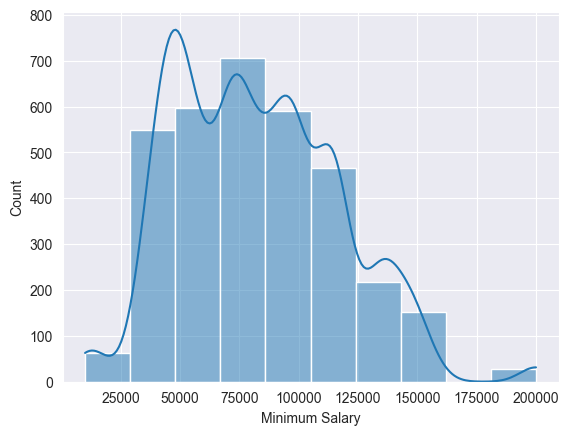

In [25]:
# histogram the minimum wage along with its kernel density estimate (KDE)
sns.histplot(df["Minimum Salary"], kde=True, bins=10)

<AxesSubplot: xlabel='Maximum Salary', ylabel='Count'>

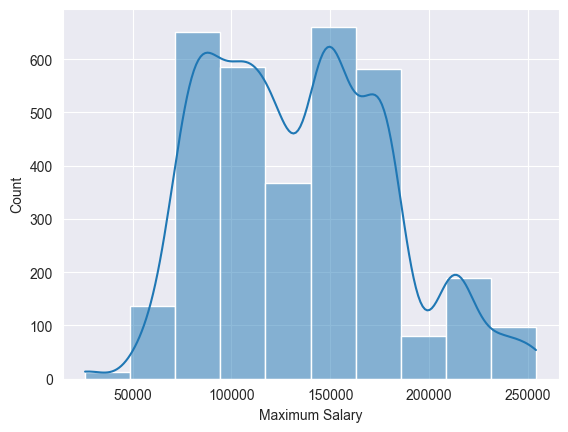

In [26]:
# histogram the maximum salary along with its kernel density estimate (KDE)
sns.histplot(df["Maximum Salary"], kde=True, bins=10)

Text(0.5, 1.0, 'Minimum Salary per State')

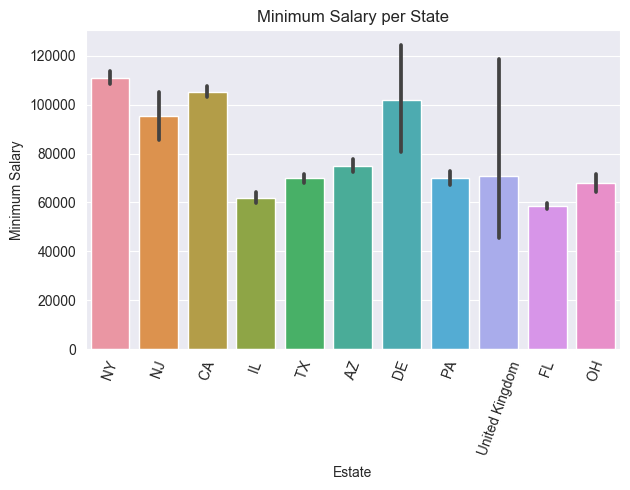

In [27]:
# bar graph with the minimum wage by state
sns.barplot(x="Estate", y="Minimum Salary", data= df)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Minimum Salary per State")

Text(0.5, 1.0, 'Maximum Salary per State')

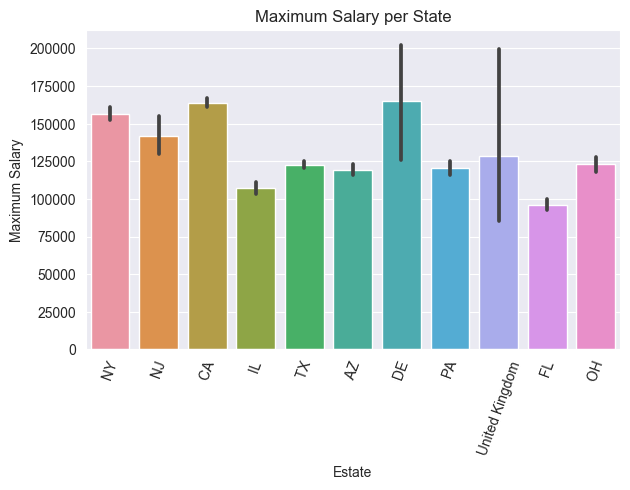

In [28]:
# bar graph with the maximum salary by state
sns.barplot(x="Estate", y="Maximum Salary", data= df)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Maximum Salary per State")

Text(0.5, 1.0, 'Estimated Salary per State')

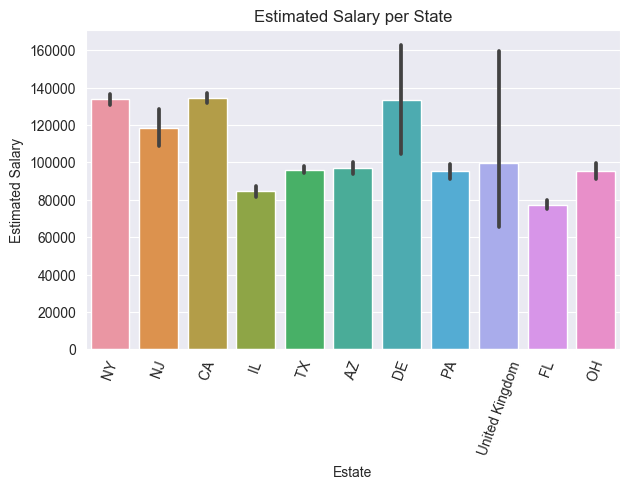

In [29]:
# bar graph with average salary by state
sns.barplot(x="Estate", y="Estimated Salary", data= df)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Estimated Salary per State")

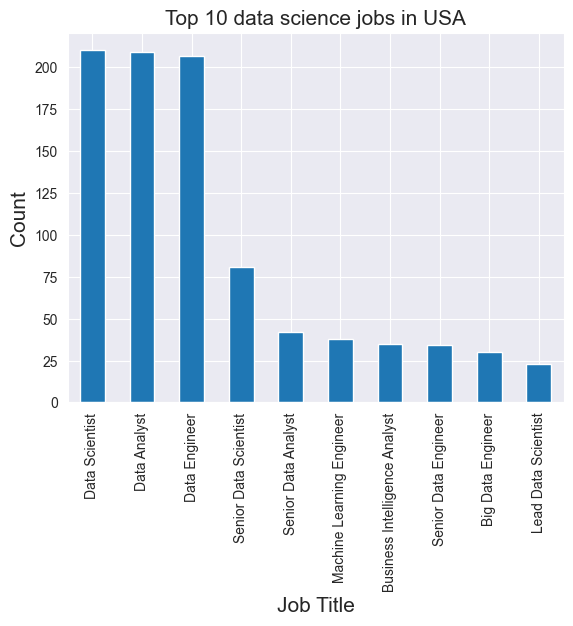

In [30]:
# find out the top 10 data science jobs
df["Job Title"].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 data science jobs in USA",fontsize=15)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

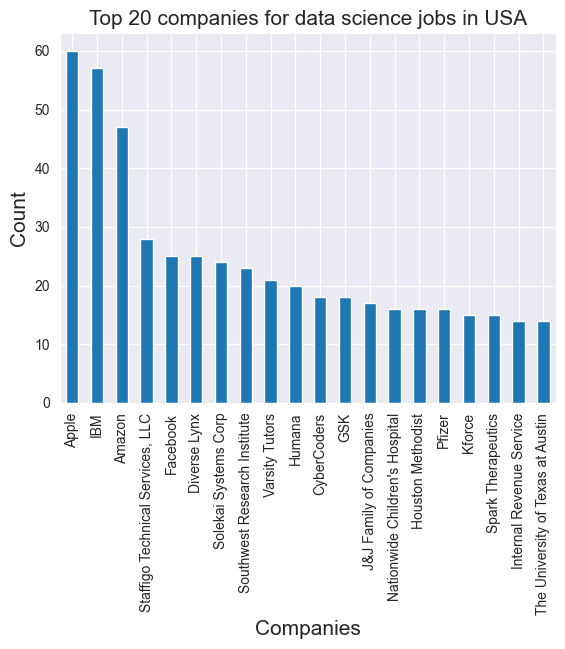

In [31]:
# Find out the top 20 companies with the most job offers for data science
df["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar()
plt.title("Top 20 companies for data science jobs in USA", fontsize=15)
plt.xlabel("Companies", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

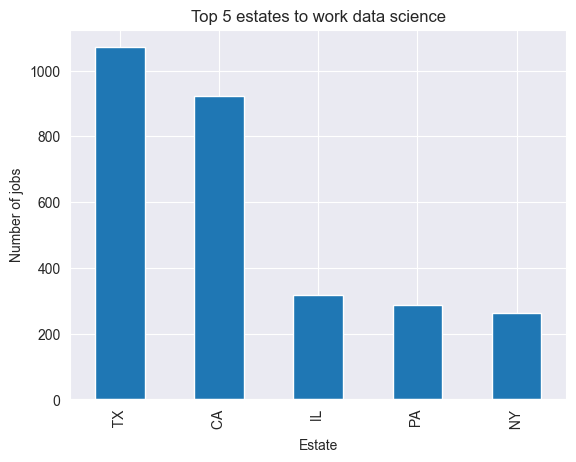

In [32]:
# Find out top 5 states with the most jobs for data science
df["Estate"].value_counts().sort_values(ascending=False).head(5).plot.bar()
plt.title("Top 5 estates to work data science")
plt.xlabel("Estate")
plt.ylabel("Number of jobs")
plt.show()

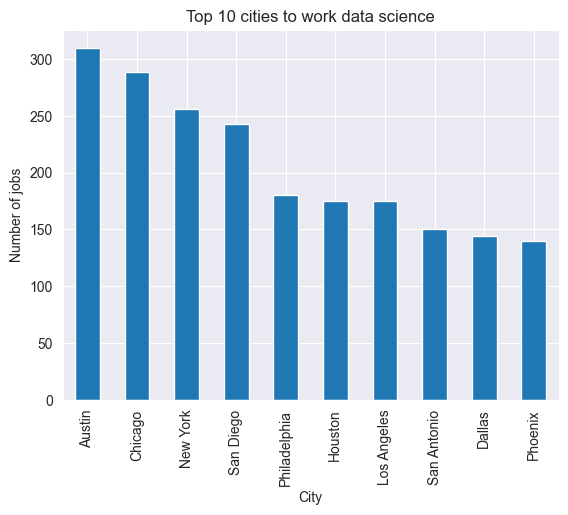

In [33]:
# find out top 10 cities with the most jobs for data science
df["City"].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 cities to work data science")
plt.xlabel("City")
plt.ylabel("Number of jobs")
plt.show()

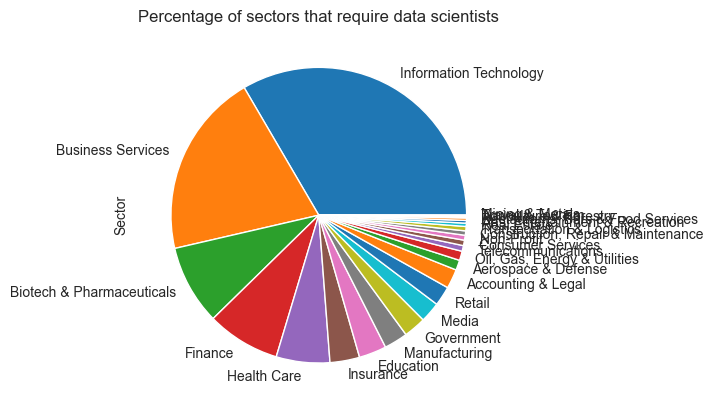

In [34]:
# find out the percentage of different industries that require roles for data science with a pie chart
df["Sector"].value_counts().plot(kind="pie")
plt.title("Percentage of sectors that require data scientists")
plt.show()

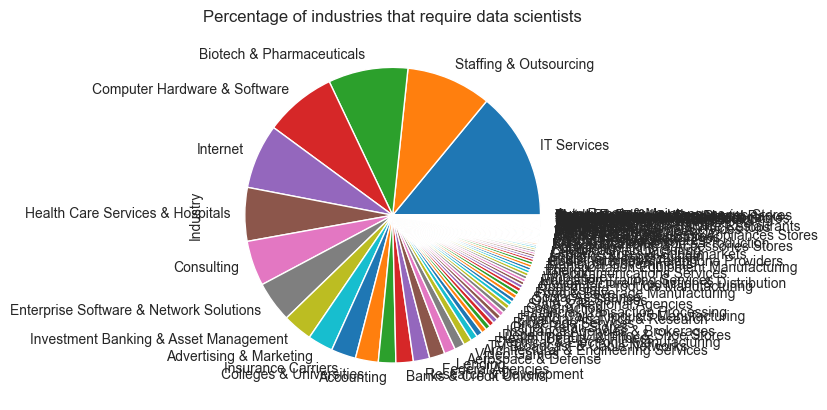

In [35]:
# find out the percentage of each of the different industries that require roles for data science
df["Industry"].value_counts().plot(kind="pie")
plt.title("Percentage of industries that require data scientists")
plt.show()

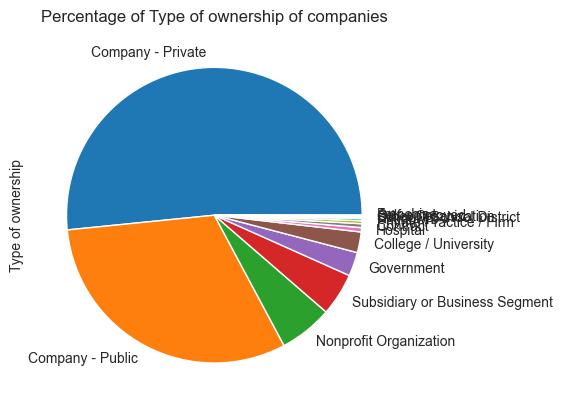

In [36]:
# find out the percentage of ownership type
df["Type of ownership"].value_counts().plot(kind="pie")
plt.title("Percentage of Type of ownership of companies")
plt.show()

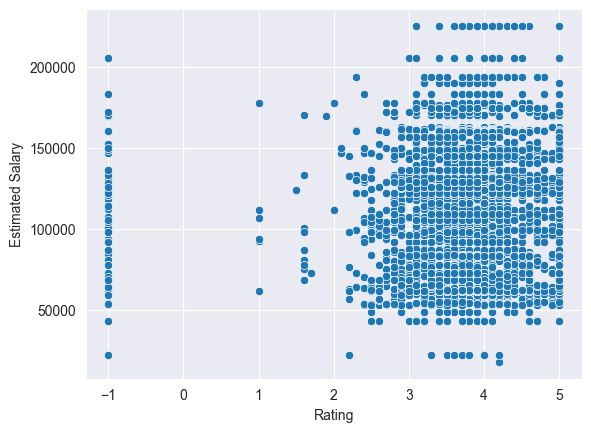

In [37]:
# Find out if there is a correlation between the company score and the salary
sns.scatterplot(x="Rating", y="Estimated Salary", data=df)
plt.show()

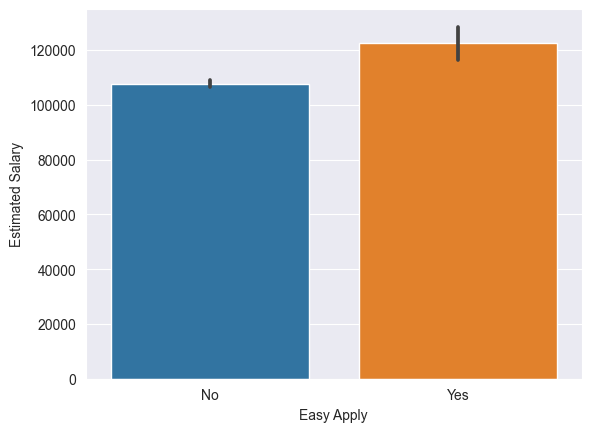

In [52]:
# find out if jobs that are easy to apply for pay more or less
sns.barplot(x="Easy Apply", y="Estimated Salary", data=df)
plt.show()